<a href="https://colab.research.google.com/github/Renee0330/bob_study_allFiles/blob/main/Code_Tutorial_Week5_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 3: Coding Demo

## In this section, we aim to demonstrate:

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# This function is defined to plot the graph.
def plot_graph(graph, diGraph = False):
    if diGraph:
        g = nx.DiGraph()
    else:
        g = nx.Graph()
    # Create a directed graph object.
    for key, value in graph.items():
        for neighbor in value:
            # Add an edge between the node and its neighbor.
            g.add_edge(key, neighbor)
    # Draw the graph.
    nx.draw(g, with_labels=True)


# This function outputs an Graph object from networkx package.
def graph_networkx(graph, diGraph = False):
    if diGraph:
        g = nx.DiGraph()
    else:
        g = nx.Graph()
    # Create a directed graph object.
    for key, value in graph.items():
        for neighbor in value:
            # Add an edge between the node and its neighbor.
            g.add_edge(key, neighbor)
    return g

## 3.1 Degree Distribution
* Degree distribution P(k): Probability that a randomly chosen node has degree k
  * Normalized histogram: $P(k) = N_K / N$
  * $N_k = \# nodes \ with \ degree \ k$.
  * $N = \# nodes\ $


[2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4]


/var/folders/w9/zrg9c19d76g31wng18vvgngsj7z1x5/T/ipykernel_50745/2235063281.py:58: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


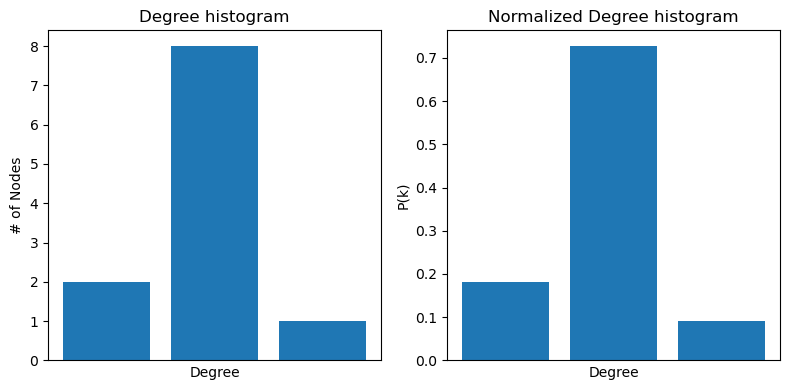

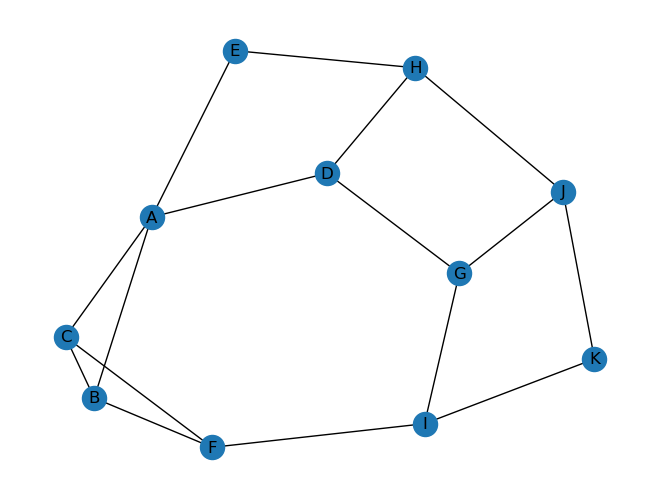

In [ ]:
graph = {'A': ['B','C','D','E'],
         'B': ['A','C','F'],
         'C': ['F','B','A'],
         'D': ['A','H','G'],
         'E': ['A','H'],
         'F': ['B','C','I'],
         'G': ['D','I','J'],
         'H': ['D','E','J'],
         'I': ['F','G','K'],
         'J': ['H','G','K'],
         'K': ['I','J']
         }



# degree_sequence 度数序列,图中所有节点的度数按某种顺序排列形成的一个列表或数组。
def count_degree(degree_sequence):
    unique_num = []     # 用来保存不同的度
    counts = []       # 用来保存每个度数对应的数量
    current_num = None   # 当前正在统计的度数
    current_count = 0   # 当前度数已经出现了多少次

    # 遍历度数序列
    for num in degree_sequence:
        # 当前的num和正在统计的度数current_num不一样：
        if num != current_num:
            # 如果current_num不是None：
            if current_num is not None:
                # 把之前的度数 current_num 加入 unique_num
                unique_num.append(current_num)
                # 把该度数出现的次数 current_count 加入 counts
                counts.append(current_count)
            # 然后更新 current_num = num，重新开始计数 current_count = 1
            current_num = num
            current_count = 1

        # 如果num == current_num:
        else:
            # 说明这个度数连续出现，计数器加1
            current_count += 1
    unique_num.append(current_num)
    counts.append(current_count)

    return np.array(unique_num), np.array(counts)

G=graph_networkx(graph)

degree_sequence = sorted((d for n, d in G.degree())) # ascending sort
print(degree_sequence)


fig, ax= plt.subplots(1, 2, figsize=(8, 4))
unique_num, counts = count_degree(degree_sequence)

ax[0].bar(unique_num, counts)
ax[0].set_title("Degree histogram")
ax[0].set_xlabel("Degree")
ax[0].set_ylabel("# of Nodes")
ax[0].set_xticks(range(degree_sequence[-1],degree_sequence[0]+1))
fig.tight_layout()
plt.xticks(range(degree_sequence[-1],degree_sequence[0]+1))


ax[1].bar(unique_num, counts/sum(counts))
ax[1].set_title("Normalized Degree histogram")
ax[1].set_xlabel("Degree")
ax[1].set_ylabel("P(k)")
ax[1].set_xticks(range(degree_sequence[-1],degree_sequence[0]+1))
fig.tight_layout()
plt.show()

plot_graph(graph)

In [ ]:
count_degree(degree_sequence)

(array([2, 3, 4]), array([2, 8, 1]))

## 3.2 Diameter
The maximum (shortest path) distance between any pair of nodes in a graph

dict_values([0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4])
dict_values([1, 0, 1, 2, 2, 1, 3, 3, 2, 4, 3])
dict_values([1, 1, 0, 2, 2, 1, 3, 3, 2, 4, 3])
dict_values([1, 2, 2, 0, 2, 3, 1, 1, 2, 2, 3])
dict_values([1, 2, 2, 2, 0, 3, 3, 1, 4, 2, 3])
dict_values([2, 1, 1, 3, 3, 0, 2, 4, 1, 3, 2])
dict_values([2, 3, 3, 1, 3, 2, 0, 2, 1, 1, 2])
dict_values([2, 3, 3, 1, 1, 4, 2, 0, 3, 1, 2])
dict_values([3, 2, 2, 2, 4, 1, 1, 3, 0, 2, 1])
dict_values([3, 4, 4, 2, 2, 3, 1, 1, 2, 0, 1])
dict_values([4, 3, 3, 3, 3, 2, 2, 2, 1, 1, 0])
Diameters in the slides:  4
Diameters in the library:  4


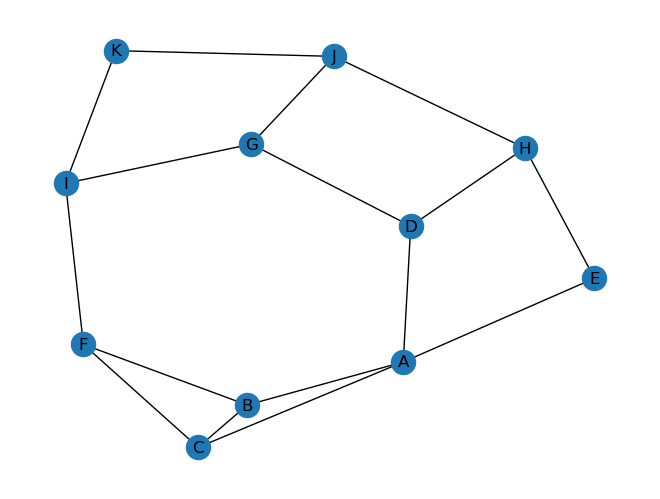

In [ ]:
def bfs_max_length(adj_list, start_node):
    # Initialize visited dictionary to keep track of which nodes have been visited
    visited = {node: False for node in adj_list}
    # Set the starting node to visited
    visited[start_node] = True
    # We use "inf" to represent nodes that are not reachable from the starting node
    dist = {node: float("inf") for node in adj_list}
    dist[start_node] = 0
    # Initialize a queue to hold the nodes to be visited
    queue = [start_node]
    # Perform BFS algorithm
    while queue:
        # Dequeue the node at the front of the queue
        curr_node = queue.pop(0)
        # Visit all the neighbors of the current node
        for neighbor in adj_list[curr_node]:
            if not visited[neighbor]:
                # Mark the neighbor as visited
                visited[neighbor] = True
                # Update the distance of the neighbor from the starting node
                dist[neighbor] = dist[curr_node] + 1
                # Enqueue the neighbor to be visited later
                queue.append(neighbor)
    # Return the distance dictionary
    print(dist.values())
    return max(dist.values())

def diameter(adj_list):
    diameter = 0
    for i in adj_list.keys():
        diameter = max(diameter, bfs_max_length(adj_list, i))
    return diameter

print('Diameters in the slides: ', diameter(graph))
print('Diameters in the library: ', nx.diameter(graph_networkx(graph)))
plot_graph(graph)

## 3.3  Clustering Coefficient for Undirected Graphs

In [ ]:
# this prototype only works for undirected unweighted graph with no disconnected nodes
def clustering_coefficient(graph, node):
    neighbors = graph[node]
    degree = len(neighbors)
    if degree < 2:
        return 0

    edges = 0
    for neighbor in neighbors:
        edges = edges + len(set(graph[neighbor]).intersection(set(neighbors)))

    edges = edges/2
    possible_triangles = degree * (degree - 1) / 2

    return edges / possible_triangles

for node in graph:
    print("{}: {}".format(node,clustering_coefficient(graph, node)))

print('clustering coefficient in the library: ', nx.clustering(graph_networkx(graph)))

A: 0.16666666666666666
B: 0.6666666666666666
C: 0.6666666666666666
D: 0.0
E: 0.0
F: 0.3333333333333333
G: 0.0
H: 0.0
I: 0.0
J: 0.0
K: 0.0
clustering coefficient in the library:  {'A': 0.16666666666666666, 'B': 0.6666666666666666, 'C': 0.6666666666666666, 'D': 0, 'E': 0, 'F': 0.3333333333333333, 'H': 0, 'G': 0, 'I': 0, 'J': 0, 'K': 0}


## 3.4 Connected components
A component of an undirected graph is a subgraph
- in which any two vertices are connected to each other by paths,
- and which is connected to no additional vertices in the original graph.

['A', 'B', 'C', 'D']
['E', 'F', 'G', 'H']
['I', 'J', 'K']


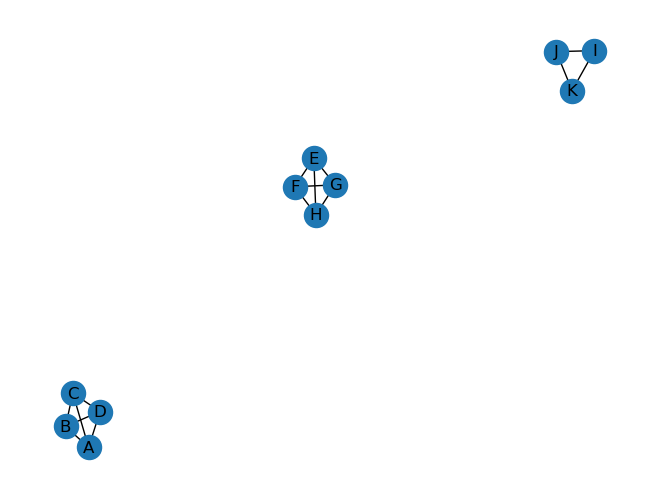

In [ ]:
def find_components(adj_list):
    # Initialize visited dictionary to keep track of which nodes have been visited
    visited = {node: False for node in adj_list}
    # Set the starting node to visited
    while [keys for keys in visited if visited[keys] == False]:
        component = []
        start_node = [keys for keys in visited if visited[keys]== False][0]
        visited[start_node] = True
        component.append(start_node)
        # We use "inf" to represent nodes that are not reachable from the starting node
        dist = {node: float("inf") for node in adj_list}
        dist[start_node] = 0
        # Initialize a queue to hold the nodes to be visited
        queue = [start_node]
        # Perform BFS algorithm
        while queue:
            # Dequeue the node at the front of the queue
            curr_node = queue.pop(0)
            # Visit all the neighbors of the current node
            for neighbor in adj_list[curr_node]:
                if not visited[neighbor]:
                    # Mark the neighbor as visited
                    visited[neighbor] = True
                    component.append(neighbor)
                    # Update the distance of the neighbor from the starting node
                    dist[neighbor] = dist[curr_node] + 1
                    # Enqueue the neighbor to be visited later
                    queue.append(neighbor)

        print(component)

graph = {
  'A': ['B', 'C', 'D'],
  'B': ['A', 'C', 'D'],
  'C': ['A', 'B', 'D'],
  'D': ['A', 'B', 'C'],
  'E': ['F', 'G', 'H'],
  'F': ['E', 'G', 'H'],
  'G': ['E', 'F', 'H'],
  'H': ['E', 'F', 'G'],
  'I': ['J', 'K'],
  'J': ['I', 'K'],
  'K': ['I', 'J']
}

find_components(graph)
plot_graph(graph)